# DataSet

In [ ]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Imports

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Data Collection

In [ ]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
def clean_dataframe(df):
  """
  Retrieves dataframe and converts all columns to lower case and replaces
  any spaces with underscores. It also does the same with an object columns
  """
  df.columns = df.columns.str.lower().str.replace(' ', '_')
  categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

  for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
  
  return df

In [ ]:
df = clean_dataframe(df)
df.sample(1).T

,1425
customerid,7077-xjmet
gender,male
seniorcitizen,0
partner,yes
dependents,no
tenure,12
phoneservice,yes
multiplelines,no
internetservice,dsl
onlinesecurity,no


# Inital Preprocessing
* Check Data Types - Are they the correct data types 
* Get Info 
* Describe Data 


## Data Types

In [ ]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Change total charges to correct  datatype and remove missing values

In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [ ]:
df['totalcharges'].isnull().sum()

11

In [ ]:
df = df.dropna()

In [ ]:
len(df)

7032

In [ ]:
df['churn'] = (df['churn'] == 'yes').astype(int)
df['churn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7032, dtype: int64

## Dataframe information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [ ]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [ ]:
df.describe(include=['O'])

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-vhveg,male,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


# Create Test and Validation Sets


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=12)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [ ]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA
* Check missing values 
* Look at Numerical and Categorical Variables

In [ ]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3457,8566-yprgl,female,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,mailed_check,19.50,19.50,0
612,2804-etqdk,male,0,no,yes,66,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.55,1357.10,0
589,0795-lafgp,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,electronic_check,90.40,6668.05,0
2685,5781-bkhop,female,0,yes,no,72,yes,yes,fiber_optic,yes,...,yes,no,yes,no,two_year,no,bank_transfer_(automatic),100.65,7334.05,0
1549,4237-rlaqd,male,0,no,no,1,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,45.85,45.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0297-rbcsg,male,0,no,no,19,yes,no,dsl,no,...,no,yes,no,yes,one_year,yes,bank_transfer_(automatic),65.35,1231.85,0
5200,6050-ijrhs,female,0,yes,yes,70,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,electronic_check,106.50,7397.00,0
3987,7625-xcqrh,female,0,no,no,11,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,76.50,837.95,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


Check Missing Values 

In [ ]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_full_train.churn.value_counts()

0    4122
1    1503
Name: churn, dtype: int64

In [ ]:
df_full_train.churn.value_counts(normalize=True)

0    0.7328
1    0.2672
Name: churn, dtype: float64

In [ ]:
global_churn_rate = df_full_train.churn.mean()

# Feature Selection



## Variance Thresholding

In [ ]:
# screen through our features and list those with high numbers of unique values
for col in df_full_train.columns:
    fraction_unique = df_full_train[col].unique().shape[0] / df_full_train.shape[0]
    if fraction_unique > 0.5:
        print(col)

customerid
totalcharges


In [ ]:
df_full_train.drop('customerid', axis=1, inplace=True)

# Sort numerical & categorical variables

In [ ]:
df_full_train.columns[:-1]

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [ ]:
def separate_cat_and_num_columns(df, skip):
  """
  Splits categorical & numerical columns for further analysis. 
  The negative 1 is to remove the target column if there is one.
  the skip parameters, skips any numerical data types that should be 
  in categorical 
  """
  numerical = []
  categorical = []

  for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]):
      numerical.append(col)
    else:
      categorical.append(col)
  
  if len(skip) > 0:
    categorical.append(skip)
    numerical.remove(skip)
  return numerical, categorical 

In [ ]:
numerical, categorical = separate_cat_and_num_columns(df_full_train, skip='seniorcitizen')

In [ ]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
df_full_train[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
seniorcitizen       2
dtype: int64

# Feature Importance


## Risk Ratio

Difference: 

If the Group mean is > than the Gloabl mean it means they are more likely to churn. 

If the global mean is higher it means they are less likely to churn

Risk Ratio:

Risk = Group / Global = > 1: More likely to churn, < 1: Less likely to churn

In [ ]:
from IPython.display import display
def risk_ratio_to_target(df, categorical, target):
  """
  Performs the risk ratio to the target
  """
  global_rate = df[f'{target}'].mean()

  for c in categorical:
    df_group = df.groupby(c)[f"{target}"].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_rate
    df_group['risk'] = df_group['mean'] / global_rate
    display(df_group)
    print()

In [ ]:
risk_ratio_to_target(df_full_train, categorical, target="churn")

,mean,count,diff,risk
gender,,,,
female,0.271716,2786,0.004516,1.016900
male,0.262769,2839,-0.004431,0.983415


,mean,count,diff,risk
partner,,,,
no,0.330482,2923,0.063282,1.236835
yes,0.198742,2702,-0.068458,0.743794


,mean,count,diff,risk
dependents,,,,
no,0.313989,3946,0.046789,1.175108
yes,0.157236,1679,-0.109964,0.588460


,mean,count,diff,risk
phoneservice,,,,
no,0.257519,532,-0.009681,0.963768
yes,0.268211,5093,0.001011,1.003785


,mean,count,diff,risk
multiplelines,,,,
no,0.251210,2687,-0.015990,0.940155
no_phone_service,0.257519,532,-0.009681,0.963768
yes,0.287199,2406,0.019999,1.074845


,mean,count,diff,risk
internetservice,,,,
dsl,0.194215,1936,-0.072985,0.726852
fiber_optic,0.418848,2483,0.151648,1.567546
no,0.072139,1206,-0.195061,0.269982


,mean,count,diff,risk
onlinesecurity,,,,
no,0.417586,2809,0.150386,1.562823
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.150932,1610,-0.116268,0.564864


,mean,count,diff,risk
onlinebackup,,,,
no,0.398703,2468,0.131503,1.492153
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.221425,1951,-0.045775,0.828686


,mean,count,diff,risk
deviceprotection,,,,
no,0.390145,2476,0.122945,1.460125
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.231601,1943,-0.035599,0.866769


,mean,count,diff,risk
techsupport,,,,
no,0.418934,2757,0.151734,1.567865
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.157040,1662,-0.110160,0.587723


,mean,count,diff,risk
streamingtv,,,,
no,0.336908,2238,0.069708,1.260883
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.303530,2181,0.036330,1.135967


,mean,count,diff,risk
streamingmovies,,,,
no,0.332297,2251,0.065097,1.243626
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.308118,2168,0.040918,1.153137


,mean,count,diff,risk
contract,,,,
month-to-month,0.428155,3090,0.160955,1.602378
one_year,0.119088,1184,-0.148112,0.445688
two_year,0.028868,1351,-0.238332,0.108037


,mean,count,diff,risk
paperlessbilling,,,,
no,0.166376,2296,-0.100824,0.622666
yes,0.336738,3329,0.069538,1.260246


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.165282,1204,-0.101918,0.618572
credit_card_(automatic),0.163097,1214,-0.104103,0.610394
electronic_check,0.456131,1892,0.188931,1.707077
mailed_check,0.184791,1315,-0.082409,0.691583


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236182,4704,-0.031018,0.883915
1,0.425624,921,0.158424,1.592905


## Phi k

In [ ]:
!pip install phik
import phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_full_train['seniorcitizen'] = df_full_train['seniorcitizen'].astype('category')
df_full_train.dtypes

gender                object
seniorcitizen       category
partner               object
dependents            object
tenure                 int64
phoneservice          object
multiplelines         object
internetservice       object
onlinesecurity        object
onlinebackup          object
deviceprotection      object
techsupport           object
streamingtv           object
streamingmovies       object
contract              object
paperlessbilling      object
paymentmethod         object
monthlycharges       float64
totalcharges         float64
churn                  int64
dtype: object

In [ ]:
# get the phi_k correlation matrix between all variables
p_corr = df_full_train.phik_matrix()

interval columns not set, guessing: ['tenure', 'monthlycharges', 'totalcharges', 'churn']


In [ ]:
p_corr['churn'].sort_values(ascending=False)

churn               1.000000
tenure              0.466544
paymentmethod       0.450528
monthlycharges      0.355205
paperlessbilling    0.291582
totalcharges        0.273106
dependents          0.250404
contract            0.249825
seniorcitizen       0.244620
partner             0.230017
onlinesecurity      0.210344
techsupport         0.208976
internetservice     0.195064
onlinebackup        0.175940
deviceprotection    0.169132
streamingtv         0.140508
streamingmovies     0.139804
multiplelines       0.020753
phoneservice        0.000000
gender              0.000000
Name: churn, dtype: float64

In [ ]:
categorical = ['paymentmethod']
numerical = ['monthlycharges', 	'tenure']

## Mutual Information - Not ran in this project

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
# def mutual_information_categorical(series):
#   return mutual_info_score(series, df_full_train.churn)

In [ ]:
# mi = df_full_train[categorical].apply(mutual_information_categorical)
# mi.sort_values(ascending=False)

contract            0.097114
onlinesecurity      0.064117
techsupport         0.063183
internetservice     0.055333
onlinebackup        0.046461
paymentmethod       0.044772
deviceprotection    0.043555
streamingtv         0.032672
streamingmovies     0.032433
paperlessbilling    0.018651
dependents          0.014075
seniorcitizen       0.011645
partner             0.011199
multiplelines       0.000769
gender              0.000051
phoneservice        0.000025
dtype: float64

## Numerical Correlation - Not ran in this project

In [ ]:
# df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

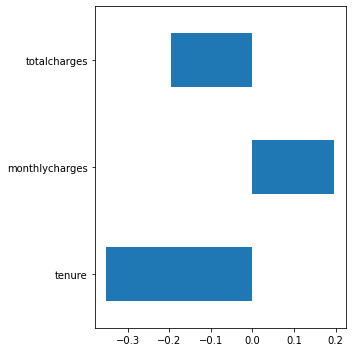

In [ ]:
# import matplotlib.pyplot as plt

# f = plt.figure(figsize=(5, 5))
# df_full_train[numerical].corrwith(df_full_train.churn).plot.barh()
# plt.tight_layout()

In [ ]:
# df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [ ]:
# df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12) ].churn.mean()

0.3994413407821229

In [ ]:
# df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

# One-hot encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges',
       'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'tenure'], dtype=object)

#Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
model.intercept_[0]

-1.489733890751467

In [ ]:
model.coef_[0].round(3)

array([ 0.303, -0.507, -1.286,  0.027, -0.456, -0.471,  0.008, -0.571,
       -0.037])

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]

In [ ]:
churn_decision = y_pred >= 0.5

In [ ]:
(y_val == churn_decision).mean()

0.7955555555555556

Predicition DataFrame 

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred 
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.038209,0,0,True
1,0.361824,0,1,False
2,0.664697,1,1,True
3,0.752507,1,1,True
4,0.197283,0,0,True
...,...,...,...,...
1120,0.556523,1,0,False
1121,0.465020,0,1,False
1122,0.327215,0,1,False
1123,0.219697,0,0,True


In [ ]:
df_pred.correct.mean()

0.7955555555555556

Without SMOTE: Accuracy is:  80%

# Over-Sampling Analysis



In [ ]:
# https://imbalanced-learn.org/stable/over_sampling.html
!pip install imbalanced-learn
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def train_classifier(X, y, X_val, y_val):
  model = LogisticRegression(solver='liblinear')
  model.fit(X, y)
  print(f"Intercept: {model.intercept_[0]}")
  print(f"Coefficients: {model.coef_[0].round(3)}")
  print(f"Score: {model.score(X, y)}")
  print()
  y_pred = model.predict_proba(X_val)[:,1]
  decision = y_pred > 0.5
  print(f"Accuracy: {(y_val == decision).mean()}")
  return y_pred

## Naive random over-sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled =ros.fit_resample(X_train, y_train)

In [ ]:
Counter(y_resampled)

Counter({0: 3299, 1: 3299})

### Train Classifier 

In [ ]:
y_ros_pred = train_classifier(X_resampled,y_resampled, X_val, y_val)

Intercept: -0.9416409526342011
Coefficients: [ 0.581 -0.332 -1.191  0.026 -0.354 -0.377  0.184 -0.394 -0.032]
Score: 0.7497726583813277

Accuracy: 0.7226666666666667


## SMOTE Analysis

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

In [ ]:
Counter(y_smote)

Counter({0: 3299, 1: 3299})

In [ ]:
# constructed feature names and values are returned rather than the original ones
# ori = dv.inverse_transform(X)

In [ ]:
y_smote_pred  = train_classifier(X_smote,y_smote, X_val, y_val)

Intercept: -0.9664283226683286
Coefficients: [ 0.586 -0.379 -1.173  0.026 -0.396 -0.425  0.281 -0.427 -0.032]
Score: 0.7552288572294634

Accuracy: 0.7253333333333334


## ADASYN Analysis

In [ ]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train, y_train)

In [ ]:
Counter(y_adasyn)

Counter({0: 3299, 1: 3232})

In [ ]:
y_adasyn_pred  = train_classifier(X_adasyn,y_adasyn, X_val, y_val)

Intercept: -0.8937304477479369
Coefficients: [ 0.646 -0.349 -1.191  0.021 -0.398 -0.336  0.22  -0.379 -0.021]
Score: 0.7171949165518298

Accuracy: 0.7128888888888889


With OverSampling: Accuracy is:  73%

# Using the model

In [ ]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_full_train, y_full_train)

LogisticRegression(solver='liblinear')

In [ ]:
model.score(X_full_train, y_full_train)

0.7916444444444445

In [ ]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')

In [ ]:
X_test = dv.transform(dict_test)

In [ ]:
y_pred_test = model.predict_proba(X_test)[:, 1]

In [ ]:
predicitions = (y_pred_test >= 0.5)

In [ ]:
(predicitions == y_test).mean()

0.7803837953091685

# Evaluation Metrics 

##Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
def assess_accuracy(y_pred, y_true):
  """
  Assess which threshold provides the greatest accuracy
  """
  thresholds = np.linspace(0, 1, 21)

  scores = []

  for i in thresholds:
    score = accuracy_score(y_true, y_pred > i)
    print(f"{i:.2f}: {score:.3f}")
    scores.append(score)

  return plt.plot(thresholds, scores)

0.00: 0.268
0.05: 0.455
0.10: 0.559
0.15: 0.620
0.20: 0.669
0.25: 0.724
0.30: 0.737
0.35: 0.753
0.40: 0.770
0.45: 0.780
0.50: 0.796
0.55: 0.799
0.60: 0.788
0.65: 0.778
0.70: 0.757
0.75: 0.744
0.80: 0.733
0.85: 0.732
0.90: 0.732
0.95: 0.732
1.00: 0.732


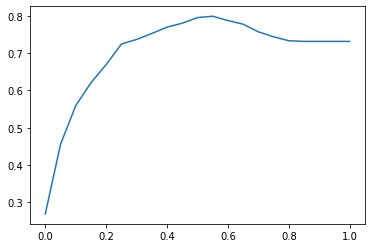

In [ ]:
oridnary = assess_accuracy(y_pred, y_val)
oridnary

0.00: 0.268
0.05: 0.335
0.10: 0.421
0.15: 0.487
0.20: 0.531
0.25: 0.570
0.30: 0.604
0.35: 0.631
0.40: 0.666
0.45: 0.706
0.50: 0.723
0.55: 0.734
0.60: 0.756
0.65: 0.774
0.70: 0.782
0.75: 0.797
0.80: 0.788
0.85: 0.767
0.90: 0.737
0.95: 0.732
1.00: 0.732


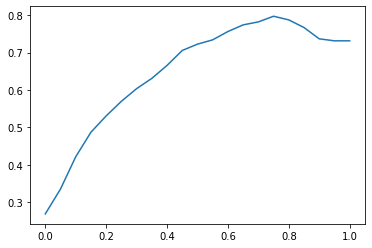

In [ ]:
ros_acc = assess_accuracy(y_ros_pred, y_val)

0.00: 0.268
0.05: 0.337
0.10: 0.425
0.15: 0.496
0.20: 0.539
0.25: 0.582
0.30: 0.609
0.35: 0.640
0.40: 0.670
0.45: 0.711
0.50: 0.725
0.55: 0.736
0.60: 0.760
0.65: 0.776
0.70: 0.783
0.75: 0.789
0.80: 0.791
0.85: 0.771
0.90: 0.741
0.95: 0.732
1.00: 0.732


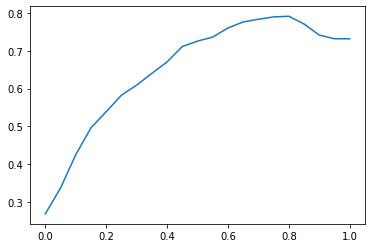

In [ ]:
smote_acc = assess_accuracy(y_smote_pred, y_val)

0.00: 0.268
0.05: 0.313
0.10: 0.369
0.15: 0.443
0.20: 0.504
0.25: 0.544
0.30: 0.577
0.35: 0.606
0.40: 0.643
0.45: 0.684
0.50: 0.713
0.55: 0.732
0.60: 0.756
0.65: 0.766
0.70: 0.788
0.75: 0.790
0.80: 0.785
0.85: 0.754
0.90: 0.732
0.95: 0.732
1.00: 0.732


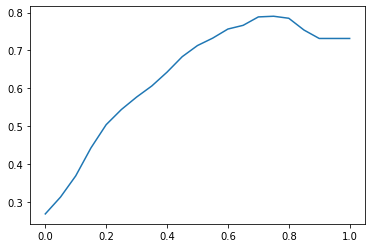

In [ ]:
adasyn_acc = assess_accuracy(y_adasyn_pred, y_val)

0.5 is the best threshold for the data with no oversampling 
however for those with oversampling the best threshold is around 0.7 - 0.75
Giving us a difference between the two analysis 

The difference between picking everyone as not churning is: 0.8 - 0.725 a difference of 7% which is not very good 

## Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix

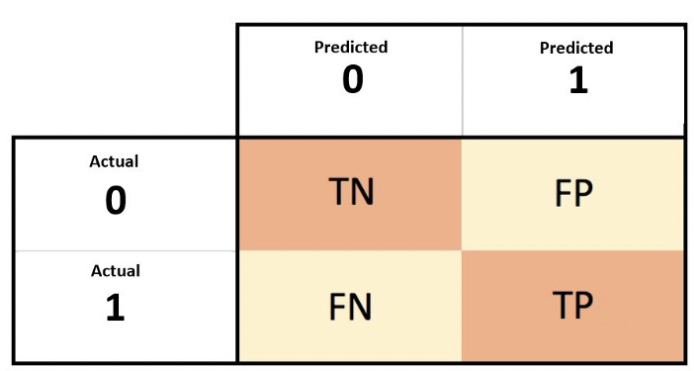

In [ ]:
confusion_matrix_ord = confusion_matrix(y_val, y_pred > 0.5)
print("No Over Sampling")
print(confusion_matrix_ord)
print()

confusion_matrix_naive = confusion_matrix(y_val, y_ros_pred > 0.75)
print("Random Over Sampling")
print(confusion_matrix_naive)
print()

confusion_matrix_smote = confusion_matrix(y_val, y_smote_pred > 0.75)
print("Smote Over Sampling")
print(confusion_matrix_smote)
print()

confusion_matrix_adasyn = confusion_matrix(y_val, y_adasyn_pred > 0.75)
print("Adasyn Over Sampling")
print(confusion_matrix_adasyn)
print()

No Over Sampling
[[733  90]
 [140 162]]

Random Over Sampling
[[744  79]
 [149 153]]

Smote Over Sampling
[[739  84]
 [153 149]]

Adasyn Over Sampling
[[746  77]
 [159 143]]



From the confusion matrix, we see the oversampling methods perform slighly well compare to no sampling method. Suprisingly the naive over sampling method performs the best. This is based on the adjusted threshold of 0.75 which we used for the sampling methods based on the previous exercise

##  Precission and Recall

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
clf_rep_ord = classification_report(y_val, y_pred > 0.5)
print("No Over Sampling")
print(clf_rep_ord )
print()

clf_rep_naive = classification_report(y_val, y_ros_pred > 0.75)
print("Random Over Sampling")
print(clf_rep_naive)
print()

clf_rep_smote = classification_report(y_val, y_smote_pred > 0.75)
print("Smote Over Sampling")
print(clf_rep_smote )
print()

clf_rep_adasyn = classification_report(y_val, y_adasyn_pred > 0.75)
print("Adasyn Over Sampling")
print(clf_rep_adasyn )
print()

No Over Sampling
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       823
           1       0.64      0.54      0.58       302

    accuracy                           0.80      1125
   macro avg       0.74      0.71      0.72      1125
weighted avg       0.79      0.80      0.79      1125


Random Over Sampling
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       823
           1       0.66      0.51      0.57       302

    accuracy                           0.80      1125
   macro avg       0.75      0.71      0.72      1125
weighted avg       0.79      0.80      0.79      1125


Smote Over Sampling
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       823
           1       0.64      0.49      0.56       302

    accuracy                           0.79      1125
   macro avg       0.73      0.70      0.71      1125
weighted avg  

Precision & Recall is quite similar across the board 

for label 1, we see the precision and recall is less than accuracy. 

So, it is not that effective.

## ROC Curves 


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

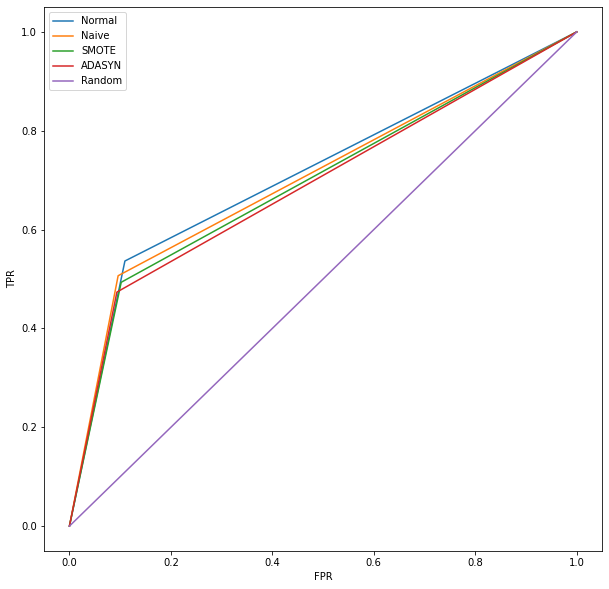

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred > 0.5)
ran_fpr, ran_tpr, ran_thresholds = roc_curve(y_val, y_ros_pred > 0.75)
smote_fpr, smote_tpr, smote_thresholds = roc_curve(y_val, y_smote_pred > 0.75)
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_val, y_adasyn_pred > 0.75)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Normal')
plt.plot(ran_fpr, ran_tpr, label='Naive')
plt.plot(smote_fpr, smote_tpr, label='SMOTE')
plt.plot(ada_fpr, ada_tpr, label='ADASYN')
plt.plot([0, 1], [0, 1], label='Random')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## AUC Curve



In [ ]:
print(f"Normal AUC: {auc(fpr, tpr)}")
print(f"Naive AUC: {auc(ran_fpr, ran_tpr)}")
print(f"SMOTE AUC: {auc(smote_fpr, smote_tpr)}")
print(f"ADAYSN AUC: {auc(ada_fpr, ada_tpr)}")

Normal AUC: 0.7135339132394004
Naive AUC: 0.7053161185454604
SMOTE AUC: 0.6956559349174801
ADAYSN AUC: 0.6899748939834075


## ROC & AUC together 

In [ ]:
print(f"Normal AUC: {roc_auc_score(y_val, y_pred > 0.5)}")
print(f"Naive AUC: {roc_auc_score(y_val, y_ros_pred > 0.5)}")
print(f"SMOTE AUC: {roc_auc_score(y_val, y_smote_pred > 0.5)}")
print(f"ADAYSN AUC: {roc_auc_score(y_val, y_adasyn_pred > 0.5)}")

Normal AUC: 0.7135339132394004
Naive AUC: 0.7549005013156518
SMOTE AUC: 0.75357881438446
ADAYSN AUC: 0.7545062081063465


## Cross Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def train(df, y_train, os=""):
  """
  trains the dataframe by first converting it into a dict
  then it fits and transform into a DictVectorizer and loads 
  into the model to be fitted/trained
  """
  dicts = df[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver='liblinear')

  if os == "SMOTE":
    X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)
    model.fit(X_smote, y_smote)
  elif os == "ADAYSN":
    X_ada, y_ada = ADASYN().fit_resample(X_train, y_train)
    model.fit(X_ada, y_ada)
  elif os == "Naive":
    X_naive, y_naive = ros.fit_resample(X_train, y_train)
    model.fit(X_naive, y_naive)
  else:
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)

  return dv, model

In [ ]:
def predict(df, dv, model):
  """
  Predict the target labels. 
  Collects a dataframe, converts it to a dict
  transforms it on an estbalished DictVectorizer 
  and uses the model to predict the target.
  """

  dicts = df[categorical + numerical].to_dict(orient='records')

  X = dv.transform(dicts)

  y_pred = model.predict_proba(X)[:, 1]

  return y_pred

### Normal 

In [ ]:
dv, model = train(df_train, y_train)

In [ ]:
y_pred = predict(df_val, dv, model)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):

  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]  

  y_train = df_train.churn.values 
  y_val = df_val.churn.values

  dv, model = train(df_train, y_train)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)

In [ ]:
scores

[0.8163598598050412,
 0.8101662317348592,
 0.8512223828205658,
 0.8406566116455025,
 0.835006397206151]

In [ ]:
print(f"{np.mean(scores).round(3)} +- {np.std(scores).round(3)}")

0.831 +- 0.015


### Naive

In [ ]:
scores_ros = []

for train_idx, val_idx in kfold.split(df_full_train):

  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]  

  y_train = df_train.churn.values 
  y_val = df_val.churn.values

  dv, model = train(df_train, y_train, os='Naive')
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores_ros.append(auc)

In [ ]:
scores_ros

[0.8161564519409804,
 0.8101502709345847,
 0.8513916993599008,
 0.8398412277942418,
 0.836177206633782]

In [ ]:
print(f"{np.mean(scores_ros).round(3)} +- {np.std(scores_ros).round(3)}")

0.831 +- 0.015


### SMOTE

In [ ]:
scores_smote = []

for train_idx, val_idx in kfold.split(df_full_train):

  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]  

  y_train = df_train.churn.values 
  y_val = df_val.churn.values

  dv, model = train(df_train, y_train, os='SMOTE')
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores_smote.append(auc)

In [ ]:
scores_smote

[0.8157144310056172,
 0.8106689969435068,
 0.8526471195539955,
 0.8363065181040048,
 0.8367002486461259]

In [ ]:
print(f"{np.mean(scores_smote).round(3)} +- {np.std(scores_smote).round(3)}")

0.83 +- 0.015


### ADASYN

In [ ]:
scores_adaysn = []

for train_idx, val_idx in kfold.split(df_full_train):

  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]  

  y_train = df_train.churn.values 
  y_val = df_val.churn.values

  dv, model = train(df_train, y_train, os='ADAYSN')
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores_adaysn.append(auc)

In [ ]:
scores_adaysn

[0.808110106241492,
 0.8064912574716496,
 0.8530394383646501,
 0.8312610718365592,
 0.8377221922702437]

In [ ]:
print(f"{np.mean(scores_adaysn).round(3)} +- {np.std(scores_adaysn).round(3)}")

0.827 +- 0.018
